# 1. Import libraries & global settings


In [3]:
# core
import os
import random
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# text processing
import re
import string
from wordcloud import WordCloud

# NLP
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# utilities
import joblib
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# plotting style
sns.set(style="whitegrid")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\raham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 2. Load dataset


In [5]:
# load CSV - change path if needed
df = pd.read_csv("Twitter_Data.csv")  # <- update filename if different
df.shape


(162980, 2)

# 3. Quick inspection & label normalization


In [6]:
# show top rows and basic info
df.head()


clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [8]:
# basic info & missing values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

print("\nUnique labels before mapping:", df['category'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Missing values per column:
 clean_text    4
category      7
dtype: int64

Unique labels before mapping: [-1.  0.  1. nan]


In [ ]:

label_map = {0: "Negative", 2: "Neutral", 4: "Positive"}
if set(df['category'].unique()) <= {0, 2, 4}:
    df['category'] = df['category'].map(label_map)

print("\nUnique labels after mapping:", df['category'].unique())



Unique labels after mapping: [-1.  0.  1. nan]


In [15]:
# Check what columns are actually in your DataFrame
print(df.columns)

# Example fix: if the sentiment column is named "label" instead of "sentiment"
if 'label' in df.columns:
    df.rename(columns={'label': 'sentiment'}, inplace=True)


Index(['clean_text', 'category'], dtype='object')


In [17]:
df.rename(columns={'category': 'sentiment'}, inplace=True)

label_map = {0: "Negative", 2: "Neutral", 4: "Positive"}
if set(df['sentiment'].unique()) <= {0, 2, 4}:
    df['sentiment'] = df['sentiment'].map(label_map)


# 4. Exploratory Data Analysis (EDA)
## 4.1 Class distribution


C:\Users\raham\AppData\Local\Temp\ipykernel_13900\691002491.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'], palette='Set2')


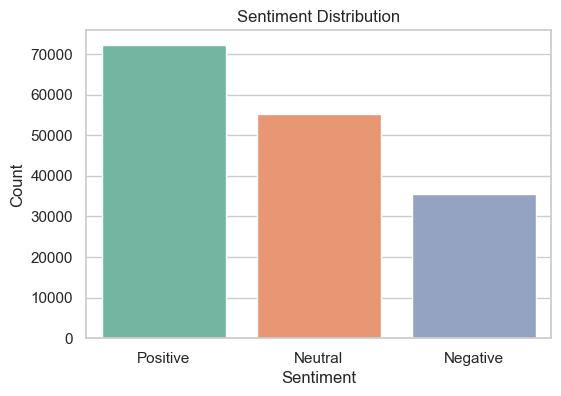

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric values to sentiment labels
sentiment_mapping = {
    -1.0: 'Negative',
     0.0: 'Neutral',
     1.0: 'Positive'
}

df['sentiment_label'] = df['sentiment'].map(sentiment_mapping)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative']')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [19]:
# Check first few rows
print(df.head())

# Check column names
print(df.columns)

# Check unique values in sentiment column
print(df['sentiment'].unique())

# Check value counts
print(df['sentiment'].value_counts())


                                          clean_text  sentiment
0  when modi promised “minimum government maximum...       -1.0
1  talk all the nonsense and continue all the dra...        0.0
2  what did just say vote for modi  welcome bjp t...        1.0
3  asking his supporters prefix chowkidar their n...        1.0
4  answer who among these the most powerful world...        1.0
Index(['clean_text', 'sentiment'], dtype='object')
[-1.  0.  1. nan]
sentiment
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64
